This demonstration was presented to the NCSA QC interest group on 5/22/2023 by Bruno Abreu.

If you have questions, please write to babreu@illinois.edu

The content is strongly based on IBM Quantum's Qiskit Intro courses:
- https://learn.qiskit.org/course/introduction/why-quantum-computing
- https://learn.qiskit.org/course/machine-learning/introduction

# Environment setup

`qiskit` is straightforward to install using `pip`. For more information, please visit their documentation: https://qiskit.org/documentation/getting_started.html

In [1]:
import qiskit.tools.jupyter

# Building quantum circuits

`qiskit` is a platform for quantum programming using the circuit-based model. The programmer defines *qubits*, the quantum counterparts of bits, and perform gate operations on them to achieve a desired outcome. We will use the `QuantumCircuit` class: https://qiskit.org/documentation/stubs/qiskit.circuit.QuantumCircuit.html

## Defining and visualizing a quantum circuit

By default, qubits are initialized in the $\lvert 0 \rangle$ state.

In [2]:
from qiskit import QuantumCircuit

In [3]:
qc = QuantumCircuit(3,3) # defines a quantum circuit with 3 quantum registers and 3 classical registers (to store measurements)

/home/zl20/kishu-venv/lib/python3.8/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


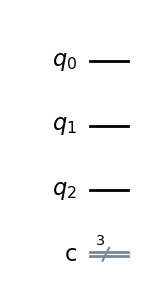

In [4]:
qc.draw('mpl')

## Applying gates

Gates are operations that can be applied on single or multiple qubits. Typically, these operations create superposition and entanglement between quantum states and qubits, and are expressed through unitary transformations. A list of possible gates is available here: https://qiskit.org/documentation/tutorials/circuits/3_summary_of_quantum_operations.html#


Below, we apply a few gates to the the circuit 3-qubit `qc` defined on the previous section.

In [5]:
qc.h(0) # apply a Hadamard gate on qubit 0
qc.cx(2,1) # apply a CNOT gate with control and target qubits 2 and 1, respectively
qc.ry(0.785, 0) # apply a 45 degrees rotation around the Y-axis for qubit 0
qc.ccx(0,1,2) # apply a Toffoli gate on all three-qubits, with the last one being the target
qc.x(0) # apply a Pauli X gate on qubit 0
qc.y(1) # apply a Pauli Y gate on qubit 1
qc.z(2) # apply a Pauli Z gate in qubit 2

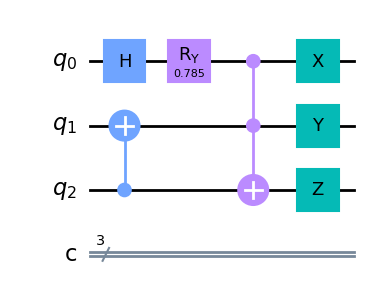

In [6]:
qc.draw('mpl')

## Measuring circuit outcomes

After superposition and entaglement are created, we are typically interested in measuring the state of one or multiple qubits, and assigning the outcome to the corresponding *classical* bit. With `qiskit`, measurements are always on the $Z$-basis ($\lvert 0 \rangle$ and $\lvert 1 \rangle$, the eigenstates of the Pauli Z matrix).

In [7]:
qc.measure([0,1,2], [0,1,2]) # measure qubits 0, 1, and 2, and assign outcome to classical bits 0, 1, and 2

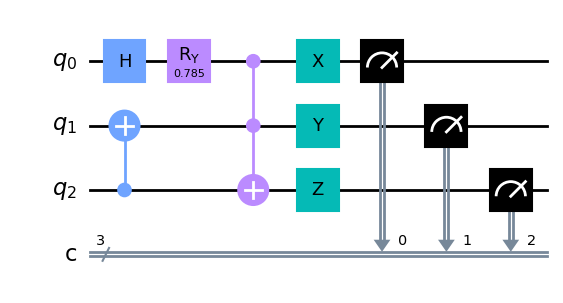

In [8]:
qc.draw('mpl')

## Visualizing qubits states

When using unitary transformations, it is possible to keep track of the quantum state of each qubit by simply performing the product of each gate and applying it to the initial state of the qubit. This can be done with the `Statevector` class: https://qiskit.org/documentation/stubs/qiskit.quantum_info.Statevector.html

In [9]:
from qiskit.quantum_info import Statevector

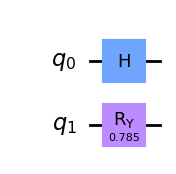

In [10]:
qc_simple = QuantumCircuit(2)
qc_simple.h(0) # create a superposition on qubit 0
qc_simple.ry(0.785, 1) # rotate qubit 1 around the y-axis
qc_simple.draw('mpl')

In [11]:
ket_simple = Statevector(qc_simple) # calculate the vector state associated to this circuit

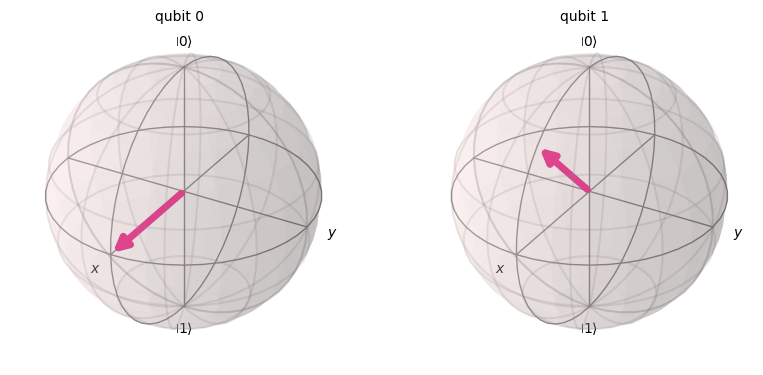

In [12]:
ket_simple.draw('bloch') # plot the states on Bloch spheres

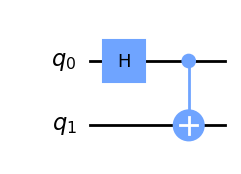

In [13]:
qc_ent = QuantumCircuit(2) # circuit with two qubits
qc_ent.h(0) # superposition in the first qubit
qc_ent.cx(0,1) # CNOT with the first and second, creating a Bell state
qc_ent.draw('mpl')

In [14]:
ket = Statevector(qc_ent)

In [15]:
ket.draw('latex') # print the latex quantum state

<IPython.core.display.Latex object>

/home/zl20/kishu-venv/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


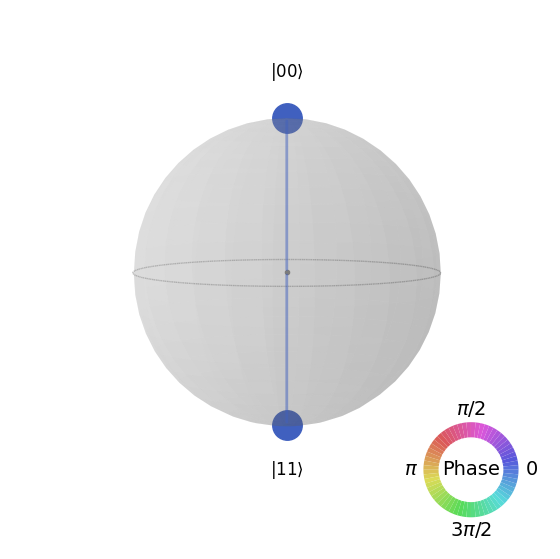

In [16]:
ket.draw('qsphere') # draw the Qsphere representation: https://qiskit.org/documentation/stubs/qiskit.visualization.plot_state_qsphere.html

# Pre-built circuits

Of course, in designing quantum applications from bottom up using the circuit-based model, patterns emerge, and certain circuit slices are always appearing. Some of these are implemented in `qiskit.circuit.library`: https://qiskit.org/documentation/apidoc/circuit_library.html

For instance, in the context of Quantum Machine Learning, the second-order Pauli-Z evolution circuit (`ZZFeatureMap`) is often used to encode classical data into quantum states: https://qiskit.org/documentation/stubs/qiskit.circuit.library.ZZFeatureMap.html#qiskit.circuit.library.ZZFeatureMap

This is also an example of a *parametrized* circuit.

In [17]:
from qiskit.circuit.library import ZZFeatureMap

In [18]:
qc_zz = ZZFeatureMap(3, reps=1)  # circuit to encode a dataset with 3 features

/home/zl20/kishu-venv/lib/python3.8/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


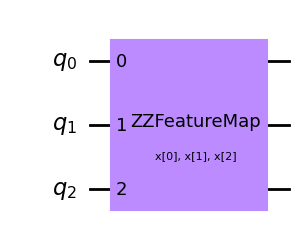

In [19]:
qc_zz.draw('mpl')

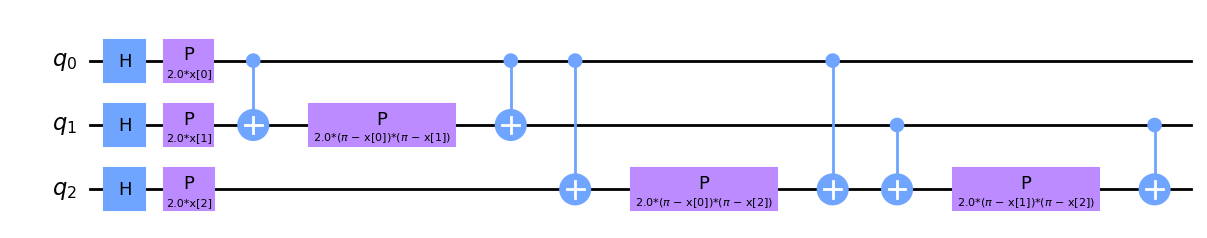

In [20]:
qc_zz.decompose().draw('mpl')

# Simulating circuits

After a circuit is built, the programmer wants to measure the outcome several times to understand the probability distribution associated to them. `qiskit` implements a simulator in its `Aer` module: https://qiskit.org/documentation/tutorials/simulators/1_aer_provider.html

`Aer` allows the programmer to choose between several simulation methods, such as density matrix, matrix product states, and others, to account for things such as noisy gate operations (non-unitary transformations).

In [21]:
from qiskit import Aer
from qiskit.visualization import plot_histogram

In [22]:
sim = Aer.get_backend('aer_simulator')  # set up the backend as the Aer simulator (it could be a real quantum computer as well!)

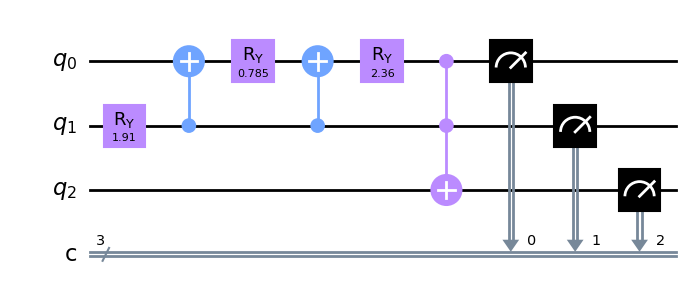

In [23]:
qc = QuantumCircuit(3, 3)  # 3 qubits with 3 classical bits
qc.ry(1.911, 1)
qc.cx(1, 0)
qc.ry(0.785, 0)
qc.cx(1, 0)
qc.ry(2.356, 0)
qc.ccx(0, 1, 2)
qc.measure([0,1,2], [0,1,2])
qc.draw('mpl')

In [24]:
job = sim.run(qc) # dispatch the circuit to the quantum simulator

In [25]:
job.result() #  visualize metadata

Result(backend_name='aer_simulator', backend_version='0.13.0', qobj_id='', job_id='d83b5bdb-caba-415a-94f2-c62ecf2e4673', success=True, results=[ExperimentResult(shots=1024, success=True, meas_level=2, data=ExperimentResultData(counts={'0x7': 321, '0x2': 362, '0x1': 341}), header=QobjExperimentHeader(creg_sizes=[['c', 3]], global_phase=0.0, memory_slots=3, metadata={}, n_qubits=3, name='circuit-188', qreg_sizes=[['q', 3]]), status=DONE, seed_simulator=3017612490, metadata={'time_taken': 0.003427533, 'num_bind_params': 1, 'parallel_state_update': 192, 'parallel_shots': 1, 'required_memory_mb': 1, 'input_qubit_map': [[2, 2], [1, 1], [0, 0]], 'method': 'statevector', 'device': 'CPU', 'num_qubits': 3, 'sample_measure_time': 0.000212681, 'active_input_qubits': [0, 1, 2], 'num_clbits': 3, 'remapped_qubits': False, 'runtime_parameter_bind': False, 'max_memory_mb': 1031584, 'noise': 'ideal', 'measure_sampling': True, 'batched_shots_optimization': False, 'fusion': {'applied': False, 'max_fused_

## Analyzing and visualizing simulation results

After running the simulations, we can get the exact counts or plot them in a histogram. The `result()` method returns an object that offers several of these features: https://qiskit.org/documentation/stubs/qiskit.result.Result.html

In [26]:
result = job.result()

In [27]:
result.get_counts()

{'111': 321, '010': 362, '001': 341}

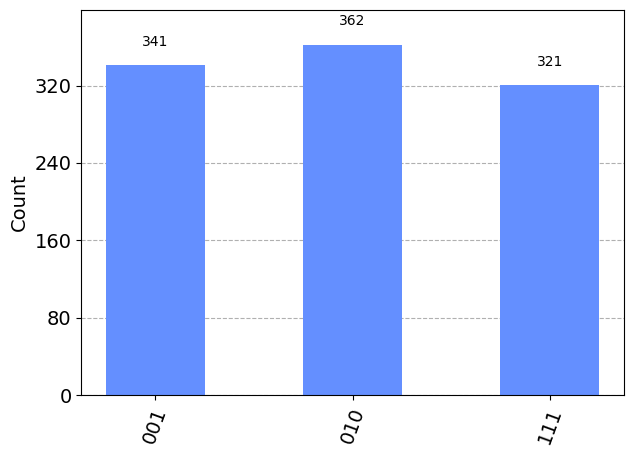

In [28]:
plot_histogram(result.get_counts())

## Controling simulation shots

It is possible to adjust several options and features for the selected backend simulator. Of particular interest is the total number of shots (how many times the circuit is prepared and measured), as well as whether or not to record each outcome:

In [29]:
job_mem = sim.run(qc, shots=25, memory=True)

In [30]:
result_mem = job_mem.result()

In [31]:
mem = result_mem.get_memory(qc)

In [32]:
print(mem)

['111', '001', '111', '001', '111', '111', '001', '111', '001', '001', '001', '010', '010', '111', '001', '111', '010', '111', '001', '001', '010', '010', '001', '010', '111']


The default number of shots for the Aer simulator is 1024, which is often not enough for non-trivial circuits.

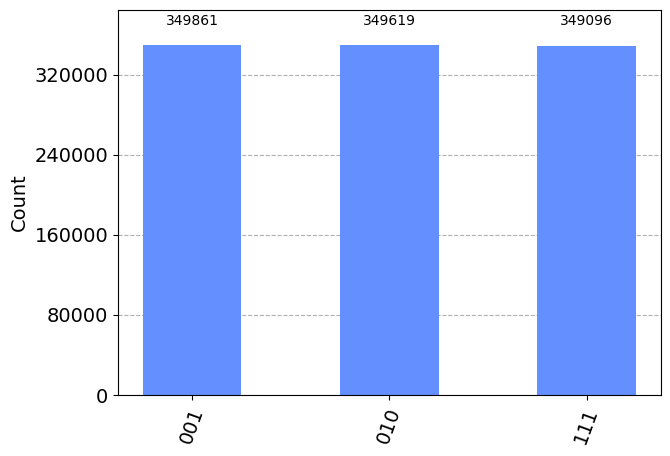

In [33]:
job_big = sim.run(qc, shots=1024*1024)
result_big = job_big.result()
plot_histogram(result_big.get_counts())

# Application examples

## Quantum communication

One important application of quantum computing is that, given very special conditions that establish intrinsic quantum correlations, it is possible to transmit information via qubits more concisely than it would be via classical bits. This is commonly referred to as *superdense coding*. Suppose we want to communicate a two-bits message ($00$, $01$, $01$, or $11$) from Alice to Bob.

In [34]:
sim = Aer.get_backend('aer_simulator')

### Manipulating two qubits

As we know now, `qiskit` initializes qubits in the $\lvert 0 \rangle$ state. Making use of the Pauli-X gate, we can flip the qubit state between $\lvert 0 \rangle$ and $\lvert 1 \rangle$ to encode the message using two-qubits, pass these two-qubits to Bob, who can then make a measurement and decode the message.

#### Transmit 00

In [35]:
# transmit "00" message
qc_alice = QuantumCircuit(2) # qubits 0 and 1 are already in the 0 state
qc_alice.barrier()

qc_bob = QuantumCircuit(2,2)
qc_bob.measure([0,1], [0,1])

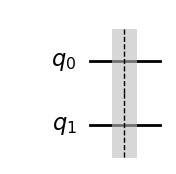

In [36]:
qc_alice.draw('mpl')

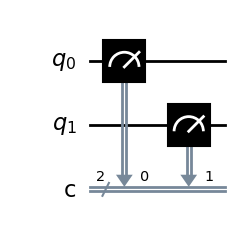

In [37]:
qc_bob.draw('mpl')

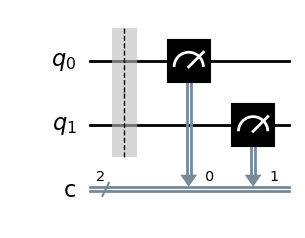

In [38]:
complete_qc = qc_alice.compose(qc_bob)
complete_qc.draw('mpl')

In [39]:
complete_qc = qc_alice.compose(qc_bob)
job = sim.run(complete_qc)
job.result().get_counts()

{'00': 1024}

#### Transmit 01

In [40]:
# transmit "01" message
qc_alice = QuantumCircuit(2) # qubits 0 and 1 are already in the 0 state
qc_alice.x(0) # flip state of qubit 0
qc_alice.barrier()

qc_bob = QuantumCircuit(2,2)
qc_bob.measure([0,1], [0,1])

In [41]:
complete_qc = qc_alice.compose(qc_bob)

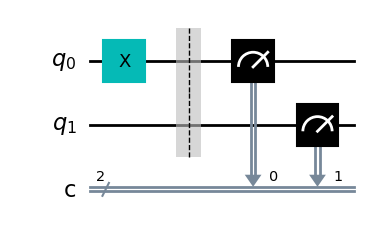

In [42]:
complete_qc.draw('mpl')

In [43]:
job = sim.run(complete_qc)
job.result().get_counts()

{'01': 1024}

#### Transmit 10

In [44]:
# transmit "01" message
qc_alice = QuantumCircuit(2) # qubits 0 and 1 are already in the 0 state
qc_alice.x(1) # flip state of qubit 1
qc_alice.barrier()

qc_bob = QuantumCircuit(2,2)
qc_bob.measure([0,1], [0,1])

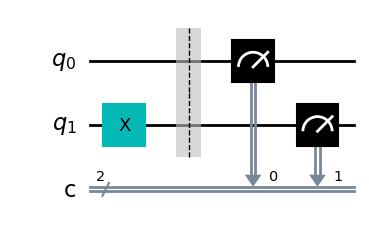

In [45]:
complete_qc = qc_alice.compose(qc_bob)
complete_qc.draw('mpl')

In [46]:
job = sim.run(complete_qc)
job.result().get_counts()

{'10': 1024}

#### Transmmit 11

In [47]:
# transmit "01" message
qc_alice = QuantumCircuit(2) # qubits 0 and 1 are already in the 0 state
qc_alice.x(0) # flip stateo f qubit 0
qc_alice.x(1) # flip state of qubit 1
qc_alice.barrier()

qc_bob = QuantumCircuit(2,2)
qc_bob.measure([0,1], [0,1])

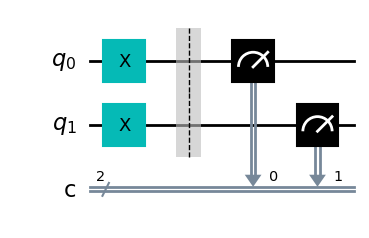

In [48]:
complete_qc = qc_alice.compose(qc_bob)
complete_qc.draw('mpl')

In [49]:
job = sim.run(complete_qc)
job.result().get_counts()

{'11': 1024}

### Manipulating a single qubit

Although the communication is working, it is possible to make it more dense. We can use entanglement in a way that allows for Alice to encode a two-bit message by manipulating and sending to Bob a single qubit. To create the entanglement, we use a third character, Charlie.

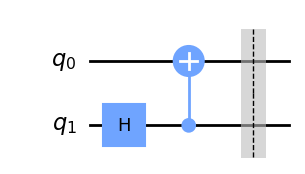

In [50]:
qc_charlie = QuantumCircuit(2)
qc_charlie.h(1)  # superpose
qc_charlie.cx(1,0) # create Bell pair
qc_charlie.barrier()
qc_charlie.draw('mpl')

Charlie then sends one of these entangled qubit to Alice, and one to Bob. Alice performs some operation on that qubit to encode the two-bit message, and when Bob receives it, Bob disentangles the qubits to decode the message. Since we are dealing with unitary gates, operations are reversible, so Bob needs to, before measuring the states of the two qubits, perform the same operations that Charlie used to prepare the entanglement, in reverse order:

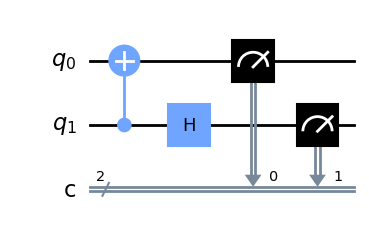

In [51]:
qc_bob = QuantumCircuit(2,2)
qc_bob.cx(1,0)  # cnot
qc_bob.h(1)  # hadamard
qc_bob.measure([0,1], [0,1])
qc_bob.draw('mpl')

#### Transmit 00

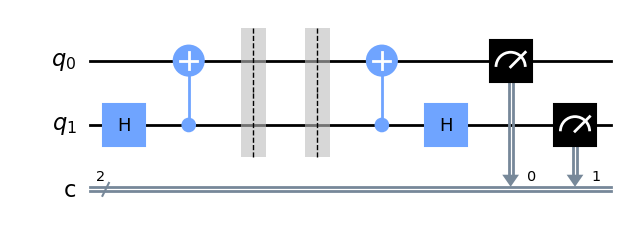

In [52]:
qc_alice = QuantumCircuit(2)
qc_alice.barrier()

complete_qc = qc_charlie.compose(qc_alice.compose(qc_bob))
complete_qc.draw('mpl')

In [53]:
job = sim.run(complete_qc)
job.result().get_counts()

{'00': 1024}

#### Transmit 01

The qubits that Charlie prepares are in the Bell state:

$\lvert \psi \rangle = \frac{1}{\sqrt{2}}\left(\lvert 00 \rangle + \lvert 11 \rangle  \right)$.

Given these delicate quantum correlations, Alice can then encode a two-bit message by performing operations in just one of them.

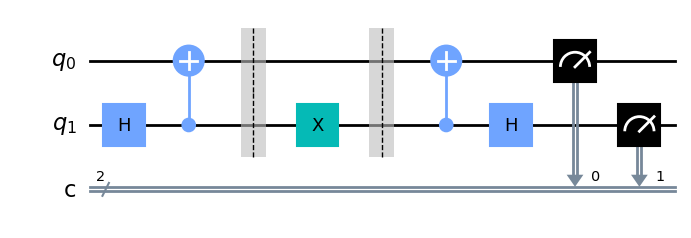

In [54]:
qc_alice = QuantumCircuit(2)
qc_alice.x(1)
qc_alice.barrier()

complete_qc = qc_charlie.compose(qc_alice.compose(qc_bob))
complete_qc.draw('mpl')

In [55]:
job = sim.run(complete_qc)
job.result().get_counts()

{'01': 1024}

#### Transmit 10

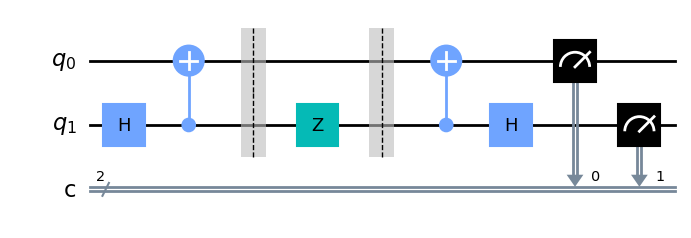

In [56]:
qc_alice = QuantumCircuit(2)
qc_alice.z(1)
qc_alice.barrier()

complete_qc = qc_charlie.compose(qc_alice.compose(qc_bob))
complete_qc.draw('mpl')

In [57]:
job = sim.run(complete_qc)
job.result().get_counts()

{'10': 1024}

#### Transmit 11

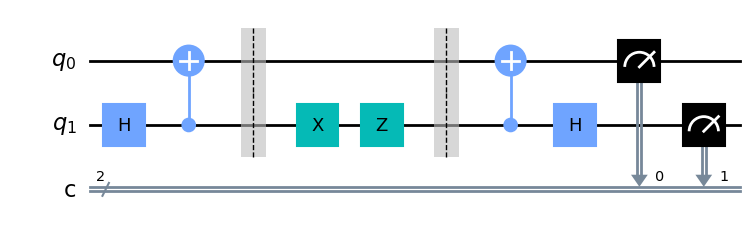

In [58]:
qc_alice = QuantumCircuit(2)
qc_alice.x(1)
qc_alice.z(1)
qc_alice.barrier()

complete_qc = qc_charlie.compose(qc_alice.compose(qc_bob))
complete_qc.draw('mpl')

In [59]:
job = sim.run(complete_qc)
job.result().get_counts()

{'11': 1024}

## Quantum machine learning

### Parametrized circuits

So far we have worked with quantum circuits composed of qubits and specific gates that perform operations over qubits. The first layer of abstraction to this model encompasses the use of parametric gates, where the unitary transformation corresponding to the gate is parametrized via one or more parameters. More information about these circuits can be found here: https://qiskit.org/documentation/tutorials/circuits_advanced/01_advanced_circuits.html#Parameterized-circuits

Below is a simple example of such a circuit:

In [60]:
from qiskit.circuit import ParameterVector
import numpy as np

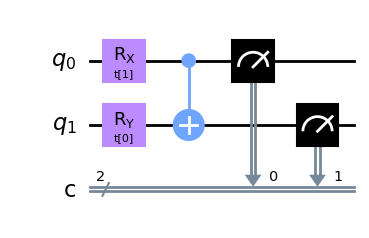

In [61]:
theta_list = ParameterVector('t', length=2)
qc = QuantumCircuit(2,2)
qc.ry(theta_list[0], 1)   # parametrize a Y-rotation gate with the first parameter
qc.rx(theta_list[1], 0) # parametrize a X-rotation gate with the second parameter
qc.cx(0,1)
qc.measure([0,1], [0,1])
qc.draw('mpl')

We can then study the parametrized circuit's output as we traverse the parameter map using simulations:

In [62]:
x = np.linspace(0, np.pi/2, 5)

In [63]:
sim = Aer.get_backend('aer_simulator')

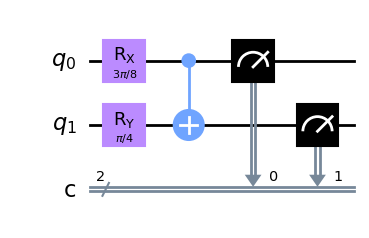

In [64]:
# assign a set of parameters to the circuit
qc_assigned = qc.assign_parameters([x[2], x[3]])
qc_assigned.draw('mpl')

In [65]:
for t0 in x:
    for t1 in x:
        qc_assigned = qc.assign_parameters([t0,t1])
        job = sim.run(qc_assigned)
        print(t0, t1, job.result().get_counts())

0.0 0.0 {'00': 1024}
0.0 0.39269908169872414 {'11': 40, '00': 984}
0.0 0.7853981633974483 {'00': 891, '11': 133}
0.0 1.1780972450961724 {'00': 706, '11': 318}
0.0 1.5707963267948966 {'00': 486, '11': 538}
0.39269908169872414 0.0 {'10': 50, '00': 974}
0.39269908169872414 0.39269908169872414 {'01': 1, '11': 34, '10': 41, '00': 948}
0.39269908169872414 0.7853981633974483 {'01': 8, '11': 157, '10': 36, '00': 823}
0.39269908169872414 1.1780972450961724 {'01': 15, '11': 304, '10': 23, '00': 682}
0.39269908169872414 1.5707963267948966 {'01': 22, '11': 476, '10': 18, '00': 508}
0.7853981633974483 0.0 {'10': 152, '00': 872}
0.7853981633974483 0.39269908169872414 {'01': 8, '11': 42, '10': 125, '00': 849}
0.7853981633974483 0.7853981633974483 {'01': 13, '11': 154, '10': 135, '00': 722}
0.7853981633974483 1.1780972450961724 {'01': 50, '11': 273, '00': 603, '10': 98}
0.7853981633974483 1.5707963267948966 {'01': 68, '10': 74, '00': 444, '11': 438}
1.1780972450961724 0.0 {'10': 315, '00': 709}
1.1780

### Variational algorithm

Using a parametrized circuit $U(\theta)$, we prepare a state $\lvert \psi(\theta) \rangle = U(\theta)\lvert 0 \rangle$ and measure some expectation value using a quantum computer. A pre-defined cost function $C(\theta)$ determines how good $\theta$ is for the problem.

![vqa1.png](./figs/vqa1.png)

### Variational quantum classifier

Here, the measured expectation value is interpreted as the output of the classifier (circuit). For binary classification with inputs $\vec{x}_i$ and outputs $y_i = \{0,1\}$, we build a parametrized quantum circuit that outputs:

$\lvert \psi(\vec{x}_i; \vec{\theta}) \rangle = U_{W(\vec{\theta})} U_{\phi(\vec{x}_i)} \lvert 0 \rangle$

where $U_{W(\vec{\theta})}$ corresponds to the variational circuit unitary transformation, and $U_{\phi(\vec{x}_i)}$ corresponds to the data encoding circuit unitary transformation. After measuring the $n$ qubits, we derive the binary output with the help of a parity function $f: \{0,1\}^n \to \{0,1\}$, which is True if the bitstring has an odd number of 1s.

Several other algorithms can be found here: https://qiskit.org/ecosystem/machine-learning/tutorials/index.html

![vaq2.png](./figs/vqa2.png)

### Implementation prototype

Below we will create an *ad hoc* dataset to illustrate the basic `qiskit` components: https://qiskit.org/ecosystem/machine-learning/stubs/qiskit_machine_learning.datasets.ad_hoc_data.html

The details of the implementation can be found here: https://learn.qiskit.org/course/machine-learning/variational-classification 

#### Preparing the dataset

In [66]:
from qiskit.utils import algorithm_globals
from qiskit_machine_learning.datasets import ad_hoc_data
import numpy as np

In [67]:
np.random.seed(42)

train_data, train_labels, test_data, test_labels = (
    ad_hoc_data(
        training_size=50,
        test_size=10,
        n=2,
        gap=0.3,
        one_hot=False
    )
)

In [68]:
train_data[0:5]

array([[3.83274304, 2.76460154],
       [2.82743339, 5.84336234],
       [0.69115038, 0.43982297],
       [5.46637122, 0.87964594],
       [1.44513262, 5.27787566]])

In [69]:
train_labels[0:5]

array([0, 0, 0, 0, 0])

#### Building the training circuit

In [70]:
from qiskit.circuit.library import ZZFeatureMap, TwoLocal

In [71]:
feature_map = ZZFeatureMap(feature_dimension=2, reps=2)
variational_qc = TwoLocal(2, ['ry', 'rz'], 'cz', reps=2)

/home/zl20/kishu-venv/lib/python3.8/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


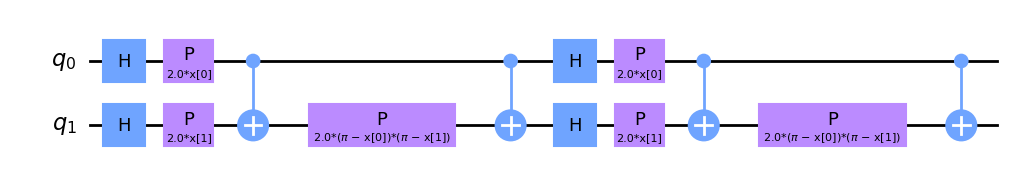

In [72]:
feature_map.decompose().draw('mpl')

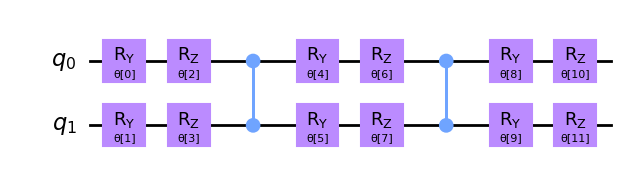

In [73]:
variational_qc.decompose().draw('mpl')

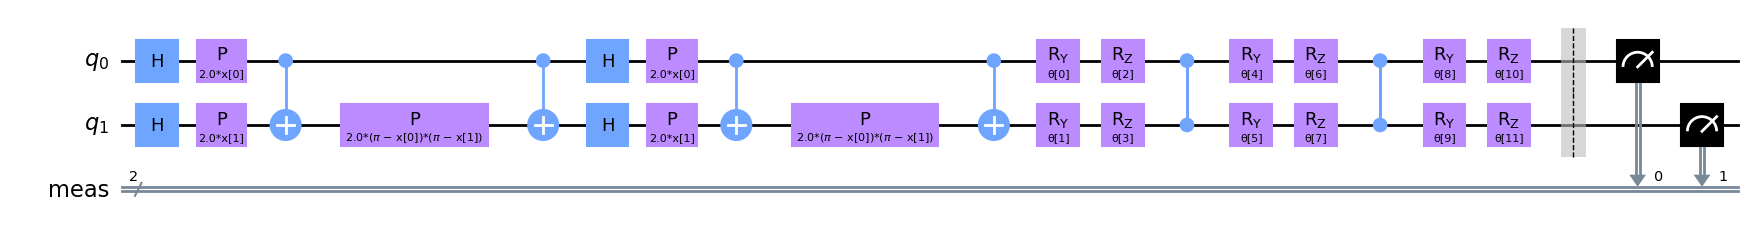

In [74]:
qc = feature_map.compose(variational_qc)
qc.measure_all()
qc.decompose().draw('mpl')

### Qiskit implementation

Fortunately, `qiskit` implements variational quantum classifiers in the VQC class: https://qiskit.org/ecosystem/machine-learning/stubs/qiskit_machine_learning.algorithms.VQC.html

Other algorithms can be found here: https://qiskit.org/ecosystem/machine-learning/apidocs/qiskit_machine_learning.algorithms.html#

The optimizer we will use is the Simultaneous Perturbation Stochastic Approximation: https://qiskit.org/documentation/stubs/qiskit.algorithms.optimizers.SPSA.html

We can then initialize the circuit's parameter, and simply fit them to the data!